In [608]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline
#set ggplot style
# plt.style.use('ggplot')

# Load Results

In [609]:
relationtype = pd.read_csv('joincardinality/relationtype.tsv', sep='\t')
kval = '01'
relationtype = relationtype[relationtype['size']== str(kval) + 'k_rows']
relationtype.head()

,tool,type,size,percent,n,m,%involved,totaltime,time-first,Unnamed: 9
0,rdfizer,one-one,01k_rows,50,1,1,50,1.80,1.38,2500
1,rmlmapper,one-one,01k_rows,50,1,1,50,1.70,1.70,2500
8,rdfizer,n-one,01k_rows,50,5,1,25,1.94,1.45,2250
9,rmlmapper,n-one,01k_rows,50,5,1,25,1.77,1.77,2250
16,rdfizer,n-one,01k_rows,50,10,1,25,1.82,1.35,2250


In [610]:
relationtype = relationtype[['tool', 'type', 'size', '%involved', 'm', 'n', 'totaltime']]
relationtype.head()

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,one-one,01k_rows,50,1,1,1.80
1,rmlmapper,one-one,01k_rows,50,1,1,1.70
8,rdfizer,n-one,01k_rows,25,1,5,1.94
9,rmlmapper,n-one,01k_rows,25,1,5,1.77
16,rdfizer,n-one,01k_rows,25,1,10,1.82


### Config 1

In [611]:
c1 = relationtype[(
            (relationtype['%involved'].isin([25, 50])) & \
            relationtype['type'].isin(['one-one', 'one-N'])
        )]
c1.head()

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,one-one,01k_rows,50,1,1,1.80
1,rmlmapper,one-one,01k_rows,50,1,1,1.70
56,rdfizer,one-N,01k_rows,25,1,5,1.85
57,rmlmapper,one-N,01k_rows,25,1,5,1.53
64,rdfizer,one-N,01k_rows,25,1,10,1.81


In [612]:
c1.shape

(14, 7)

In [613]:
c1 = c1.sort_values(by=['size', 'm',  '%involved', 'n'])
c1 = c1.reset_index(drop=True)
c1

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,one-N,01k_rows,25,1,5,1.85
1,rmlmapper,one-N,01k_rows,25,1,5,1.53
2,rdfizer,one-N,01k_rows,25,1,10,1.81
3,rmlmapper,one-N,01k_rows,25,1,10,1.61
4,rdfizer,one-N,01k_rows,25,1,15,1.83
5,rmlmapper,one-N,01k_rows,25,1,15,1.64
6,rdfizer,one-one,01k_rows,50,1,1,1.80
7,rmlmapper,one-one,01k_rows,50,1,1,1.70
8,rdfizer,one-N,01k_rows,50,1,5,1.81
9,rmlmapper,one-N,01k_rows,50,1,5,1.65


### Config 2

In [614]:
c2 = relationtype[(
            (relationtype['%involved'].isin([25, 50])) & \
            relationtype['type'].isin(['one-one', 'n-one'])
        )]
c2.head()

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,one-one,01k_rows,50,1,1,1.80
1,rmlmapper,one-one,01k_rows,50,1,1,1.70
8,rdfizer,n-one,01k_rows,25,1,5,1.94
9,rmlmapper,n-one,01k_rows,25,1,5,1.77
16,rdfizer,n-one,01k_rows,25,1,10,1.82


In [615]:
c2.shape

(14, 7)

In [616]:
c2 = c2.sort_values(by=['size', 'm',  '%involved', 'n'])
c2 = c2.reset_index(drop=True)
c2.head()

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,n-one,01k_rows,25,1,5,1.94
1,rmlmapper,n-one,01k_rows,25,1,5,1.77
2,rdfizer,n-one,01k_rows,25,1,10,1.82
3,rmlmapper,n-one,01k_rows,25,1,10,1.63
4,rdfizer,n-one,01k_rows,25,1,15,1.98


### Config 3

In [617]:
c3 = relationtype[(
            (relationtype['%involved'].isin([25, 50])) & \
            (((relationtype['n'] == 3) & (relationtype['m'] == 5)) | \
             ((relationtype['n'] == 5) & (relationtype['m'] == 10)) | \
             ((relationtype['n'] == 1) & (relationtype['m'] == 1)) | \
             ((relationtype['n'] == 10) & (relationtype['m'] == 10))) & \
            relationtype['type'].isin(['one-one', 'n-m'])
        )]
c3.head()

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,one-one,01k_rows,50,1,1,1.800000
1,rmlmapper,one-one,01k_rows,50,1,1,1.700000
112,rdfizer,n-m,01k_rows,25,5,3,1.897179
113,rmlmapper,n-m,01k_rows,25,5,3,1.928285
114,rdfizer,n-m,01k_rows,50,5,3,1.898630


In [618]:
c3.shape

(14, 7)

In [619]:
c3 = c3.sort_values(by=['size',  '%involved', 'n', 'm'])
c3 = c3.reset_index(drop=True)
c3.head()

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,n-m,01k_rows,25,5,3,1.897179
1,rmlmapper,n-m,01k_rows,25,5,3,1.928285
2,rdfizer,n-m,01k_rows,25,10,5,1.857532
3,rmlmapper,n-m,01k_rows,25,10,5,1.950456
4,rdfizer,n-m,01k_rows,25,10,10,1.830887


### Config 4

In [620]:
c4 = relationtype[(
            (relationtype['%involved'].isin([25, 50])) & \
            (((relationtype['n'] == 15) & (relationtype['m'] == 1) & (relationtype['type'] == 'one-N') ) | \
             ((relationtype['n'] == 15) & (relationtype['m'] == 1)  & (relationtype['type'] == 'n-one')) | \
             ((relationtype['n'] == 1) & (relationtype['m'] == 1)  & (relationtype['type'] == 'one-one')) | \
             ((relationtype['n'] == 10) & (relationtype['m'] == 10)  & (relationtype['type'] == 'n-m'))) 
        )]
c4.head()

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,one-one,01k_rows,50,1,1,1.80
1,rmlmapper,one-one,01k_rows,50,1,1,1.70
24,rdfizer,n-one,01k_rows,25,1,15,1.98
25,rmlmapper,n-one,01k_rows,25,1,15,1.53
48,rdfizer,n-one,01k_rows,50,1,15,1.89


In [621]:
c4.shape

(14, 7)

In [622]:
c4 = c4.sort_values(by=['size',  '%involved', 'm', 'n'])
c4 = c4.reset_index(drop=True)
c4.head()

,tool,type,size,%involved,m,n,totaltime
0,rdfizer,n-one,01k_rows,25,1,15,1.980000
1,rmlmapper,n-one,01k_rows,25,1,15,1.530000
2,rdfizer,one-N,01k_rows,25,1,15,1.830000
3,rmlmapper,one-N,01k_rows,25,1,15,1.640000
4,rdfizer,n-m,01k_rows,25,10,10,1.830887


In [623]:
import itertools
comb = list(itertools.permutations(list(range(1, 9)), 2))
comb.append((1,1))
comb.append((2,2))
comb.append((3,3))
comb.append((4,4))
comb.append((5,5))
comb.append((6,6))
comb.append((7,7))
comb.append((8,8))
comb = sorted(comb)

In [624]:
xydf = pd.DataFrame(comb, columns=['Configurations', 'Configuration'])
tools = ['rdfizer', 'rmlmapper']
configs = [c1, c2, c3, c4]
z = {'z': []}
colors = {'c': []}
for row in xydf.iterrows():
    ix = row[0]
    x = row[1][0]
    y = row[1][1]
    print(ix, x, y)
    xix = 0 if 8/x >= 2 else 1
    xtool = tools[xix]
    yix = 0 if 8/y >= 2 else 1
    ytool = tools[yix]
    
    xconfigix = 3 if x%4 == 0 else (x % 4 - 1)
    xconfig = configs[xconfigix]
    yconfigix = 3 if y%4 == 0 else (y % 4 - 1)
    yconfig = configs[yconfigix]
    
    v = np.corrcoef( xconfig[((xconfig['tool']== xtool))]['totaltime'],
                        yconfig[((yconfig['tool']==ytool))]['totaltime']
                    )[0, 1] 
    
    k = v
    if k > 0.999999999:
            c = "#e7eff6"            
    elif k < 0:
        c = '#fe4a49'
    else:
        c = '#03396c'
    colors['c'].append(c)
    z['z'].append(np.abs(v))

0 1 1
1 1 2
2 1 3
3 1 4
4 1 5
5 1 6
6 1 7
7 1 8
8 2 1
9 2 2
10 2 3
11 2 4
12 2 5
13 2 6
14 2 7
15 2 8
16 3 1
17 3 2
18 3 3
19 3 4
20 3 5
21 3 6
22 3 7
23 3 8
24 4 1
25 4 2
26 4 3
27 4 4
28 4 5
29 4 6
30 4 7
31 4 8
32 5 1
33 5 2
34 5 3
35 5 4
36 5 5
37 5 6
38 5 7
39 5 8
40 6 1
41 6 2
42 6 3
43 6 4
44 6 5
45 6 6
46 6 7
47 6 8
48 7 1
49 7 2
50 7 3
51 7 4
52 7 5
53 7 6
54 7 7
55 7 8
56 8 1
57 8 2
58 8 3
59 8 4
60 8 5
61 8 6
62 8 7
63 8 8


In [625]:
xydf['z'] = z['z']
xydf

,Configurations,Configuration,z
0,1,1,1.000000
1,1,2,0.299639
2,1,3,0.097884
3,1,4,0.421945
4,1,5,0.647863
5,1,6,0.218665
6,1,7,0.729126
7,1,8,0.731479
8,2,1,0.299639
9,2,2,1.000000


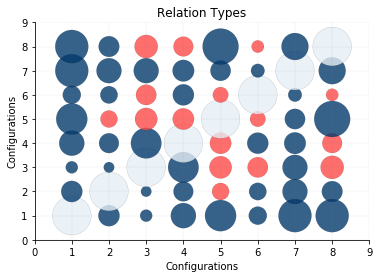

In [626]:
colors = pd.DataFrame(colors)

ploto = xydf.plot.scatter('Configurations', 'Configuration', s=xydf.z * 1500, color=colors.c, alpha=0.8, edgecolors="black", linewidth=.1)
ploto.set_title('Relation Types')
ploto.set_xlabel('Configurations')
ploto.set_ylabel('Configurations')
ploto.set_xticks([0, 1,2,3,4, 5, 6, 7, 8, 9 ])
ploto.set_yticks([0, 1,2,3,4, 5, 6, 7, 8, 9])
# ploto.set_xticklabels(['rdfizer-1-N', 
#                        'rdfizer-N-1', 
#                        'rdfizer-N-M', 
#                        'rdfizer-Comb', 
#                        'rmlmapper-1-N',
#                        'rmlmapper-N-1',
#                        'rmlmapper-N-M',
#                         'rmlmapper-Comb'], 
#                     rotation=90)
# ploto.set_yticklabels(['rdfizer-1-N', 
#                        'rdfizer-N-1', 
#                        'rdfizer-N-M', 
#                        'rdfizer-Comb', 
#                        'rmlmapper-1-N',
#                        'rmlmapper-N-1',
#                        'rmlmapper-N-M',
#                         'rmlmapper-Comb'])
ploto.spines['top'].set_visible(False)
ploto.spines['right'].set_visible(False)
#adds major gridlines
ploto.grid(color='grey', linestyle='-', linewidth=0.15, alpha=0.5)
#adds legend
#ploto.legend(categories.unique())
plt.figure(figsize=(55, 4)) 

In [627]:
# !mkdir figures/dexa
fig = ploto.get_figure()
fig.savefig("relation_type_"+ str(kval) + "k_bubble.png", dpi=300, bbox_inches='tight')